In [5]:
import pandas as pd
import seaborn as sns
smarket = pd.read_csv('smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [2]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [3]:
smarket.shape

(1250, 9)

In [4]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


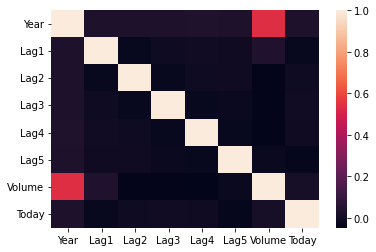

In [6]:
sns.heatmap(smarket.corr())

In [7]:
import statsmodels.formula.api as smf

In [8]:
import numpy as np

smarket['Up'] = np.where(smarket['Direction'] == 'Up',1,0)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [15]:
result6 = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = smarket).fit()
result6.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Feb 2022   Pseudo R-squ.:                0.002074
Time:                        15:06:17   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [16]:
prediction6 = result6.predict()
print(prediction6[0:10])

[0.50708413 0.48146788 0.48113883 0.51522236 0.51078116 0.50695646
 0.49265087 0.50922916 0.51761353 0.48883778]


In [17]:
result6.pred_table()

array([[145., 457.],
       [141., 507.]])

Therefore, accuracy = (145 + 507)/1250 = 52.2%

In [20]:
X = smarket[list(smarket.columns[1:-3])]
y = smarket['Up']

train_bool = smarket['Year'] < 2005
X_test = X[~train_bool]
y_test = y[~train_bool]

In [21]:
print('X_test.shape: ',X_test.shape)
print('y_test.shape: ',y_test.shape)

X_test.shape:  (252, 6)
y_test.shape:  (252,)


In [25]:
result7 = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = smarket, subset = train_bool).fit()
result7.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Feb 2022   Pseudo R-squ.:                0.001562
Time:                        15:16:52   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [26]:
result7_prob = result7.predict(X_test)
result7_prob

998     0.528220
999     0.515669
1000    0.522652
1001    0.513854
1002    0.498334
          ...   
1245    0.483637
1246    0.506048
1247    0.516658
1248    0.516124
1249    0.508072
Length: 252, dtype: float64

In [28]:
result7_pred = (result7_prob>0.5)
result7_pred

998      True
999      True
1000     True
1001     True
1002    False
        ...  
1245    False
1246     True
1247     True
1248     True
1249     True
Length: 252, dtype: bool

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,result7_pred)

array([[77, 34],
       [97, 44]], dtype=int64)

In [30]:
np.mean(result7_pred != y_test)

0.5198412698412699

#### Therefore error rate is more than even random guessing

In [31]:
result8 = smf.logit('Up ~ Lag1 + Lag2',data = smarket, subset = train_bool).fit()
result8_prob = result8.predict(X_test)
result8_pred = (result8_prob>0.5)
confusion_matrix(y_test,result8_pred)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [32]:
np.mean(result8_pred == y_test)

0.5595238095238095

#### Therefore, the model is correct 56% of the times, which is true for naive approach with this data set as well